## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# let's check stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
df = pd.read_csv(r"C:\Users\home\Downloads\archive (1)\news.csv")

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Check how many rows & columns are in the data 

In [7]:
df.shape

(6335, 4)

In [8]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [10]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [11]:
df['label'].value_counts(normalize=True)

REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

# Checks missing values

In [12]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# Data Visualization

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


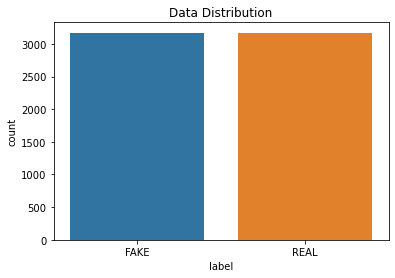

In [13]:
sns.countplot(df['label'])
plt.title('Data Distribution')
plt.show()

## Separating data and labels

In [14]:
X = df.drop(columns = 'label')
Y = df['label']

## Stemming

In [15]:
stem = PorterStemmer()

In [16]:
def stemming(text):
    stem_text = re.sub('[^a-zA-Z]',' ',text)
    stem_text = stem_text.lower()
    stem_text = stem_text.split()
    stem_text = [stem.stem(word) for word in stem_text if not word in stopwords.words('english')] 
    stem_text = ' '.join(stem_text)
    return stem_text

In [ ]:
df['text'] = df['text'].apply(stemming)

In [ ]:
x = df['text'].values
y = df['label'].values

## Coverting textual data into numeric data

In [ ]:
vect = TfidfVectorizer()
vect.fit(x)

X = vect.transform(x)

## Spliting into X and Y

In [ ]:
Xtrain, Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=2)

## Model training

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(Xtrain,Ytrain)

## Evaluation

In [ ]:
xtrain = model.predict(Xtrain)
print(xtrain)

In [ ]:
Acc = accuracy_score(xtrain,Ytrain)
print(Acc)

## Evaluation on test data

In [ ]:
xtest = model.predict(Xtest)
print(xtest)

In [ ]:
Acc = accuracy_score(xtest,Ytest)
print(Acc)

## Let's make a predicted System

In [ ]:
X_news = Xtest[2]
predict = model.predict(X_news)

print(predict)

if predict[0] == 'REAL':
    print('the news is real')
else:
    print('the news is fake')